The aim of this notebook is to find two same HVAC units which consume different power/energy. 

In [46]:
from nilmtk import *
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
ds = DataSet("/Users/nipunbatra/Downloads/wikienergy-2.h5")
original_name_dict = {b.metadata['original_name']:b.identifier.instance for b in ds.buildings.values()}
original_name_map = pd.Series(original_name_dict)
reverse_name_map = pd.Series({v:k for k,v in original_name_dict.iteritems() })

In [5]:
audits_appliances = pd.read_csv("../../data/total/audits_2013_appliances.csv")

In [7]:
audits_appliances[audits_appliances['Type__c']=='HVAC'].columns

Index([u'dataid', u'Energy_Audit__c', u'Duct_Leakage_Evaluation__c',
       u'Type__c', u'Fuel_Type__c', u'Manufacturer__c',
       u'Manufacturer_Other__c', u'Model__c', u'Model_Other__c',
       u'Manufacturing_Year__c', u'Location_of_Air_Handler__c',
       u'Type_of_Air_Handler__c', u'Gallons__c', u'Notes__c', u'BTUs__c',
       u'Seasonal_Energy_Efficiency_Rating__c',
       u'Annual_Fuel_Utilization_Efficiency__c', u'Combustion_Air_Provided__c',
       u'Timer_Attached__c', u'Water_Saving__c', u'Grill_in_Door__c',
       u'Closet_Door_Weatherstripped__c', u'Voltage__c', u'Amperage__c',
       u'Ice_Water_Dispenser_on_Door__c', u'Compartment_Configuration__c',
       u'Refrigerator_Coils__c', u'Water_Heater_Setpoint__c'],
      dtype='object')

In [88]:
age_energy = audits_appliances[audits_appliances['Type__c']=='HVAC'][[u'dataid', 'Manufacturing_Year__c','Manufacturer__c','Model__c','Gallons__c' ]].dropna()
age_energy["year"] = age_energy.Manufacturing_Year__c.convert_objects(convert_numeric=True)
age_energy = age_energy.drop("Manufacturing_Year__c", 1)
age_energy["age"] = 2014-age_energy["year"]
age_energy = age_energy.dropna()
age_energy.describe()

,dataid,Gallons__c
count,0,0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


In [91]:
age_energy = audits_appliances[audits_appliances['Type__c']=='Air Condenser/Compressor'][[u'dataid', 'Manufacturing_Year__c' ,'Manufacturer__c','Model__c']].dropna()
age_energy["year"] = age_energy.Manufacturing_Year__c.convert_objects(convert_numeric=True)
age_energy = age_energy.drop("Manufacturing_Year__c", 1)
age_energy["age"] = 2014-age_energy["year"]
age_energy = age_energy.dropna()


In [92]:
age_energy.head()

,dataid,Manufacturer__c,Model__c,year,age
0,7982,Carrier,24ABA430A310,2007,7
39,2470,Carrier,24ABB430A300,2008,6
48,3192,Carrier,25HPA536A310,2009,5
67,3036,Carrier,24ABC630A300,2011,3
76,2829,American Standard,7A4030A100A0,1994,20


In [30]:
count = pd.value_counts(age_energy.Model__c)
count = count[count>=2]

24ABA430A310    3
38BRC024310     3
24ABB330W310    3
GSX130361EA     2
24ABC630A300    2
24ABA436A310    2
XP1903623005    2
24ABB430A300    2
dtype: int64

In [41]:
i = 0
df = age_energy[age_energy.Model__c==count.index[i]]
df

,dataid,Manufacturer__c,Model__c,year,age
0,7982,Carrier,24ABA430A310,2007,7
207,114,Carrier,24ABA430A310,2008,6
388,5403,Carrier,24ABA430A310,2007,7


So, three different homes use this exact same model. Let us compare the energy and power consumption of these 3 fridges.

In [62]:
print original_name_map[7982]
print original_name_map[114]

177
6


In [65]:
ac_177 = ds.buildings[177].elec['air conditioner'].load().next()
ac_6 = ds.buildings[6].elec['air conditioner'].load().next()

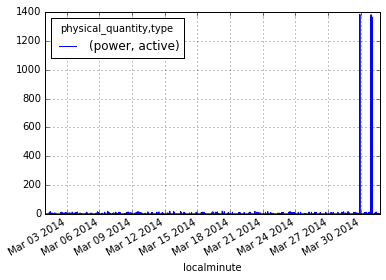

In [68]:
ac_6.plot()

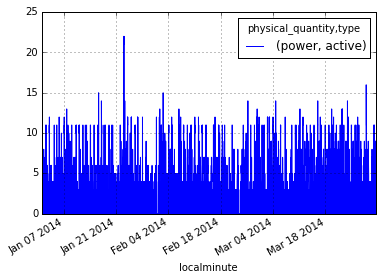

In [69]:
ac_177.plot()

Both of these ACs were not used. So, let us look at next set of ACs.

In [70]:
i = 1
df = age_energy[age_energy.Model__c==count.index[i]]
df

,dataid,Manufacturer__c,Model__c,year,age
290,8197,Carrier,38BRC024310,1999,15
291,8197,Carrier,38BRC024310,1999,15
293,8197,Carrier,38BRC024310,1999,15


In [71]:
print original_name_map[8197]

188


All these 3 ACs are in the same home.

In [81]:
ac_188_1 = ds.buildings[188].elec[('air conditioner', 1)].load().next()[('power','active')]
ac_188_2 = ds.buildings[188].elec[('air conditioner', 2)].load().next()[('power','active')]
ac_188_3 = ds.buildings[188].elec[('air conditioner', 3)].load().next()[('power','active')]

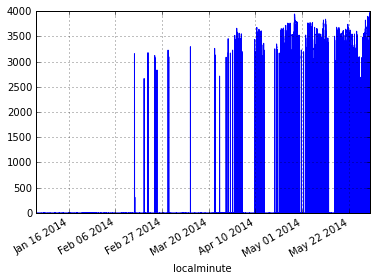

In [82]:
ac_188_1.plot()

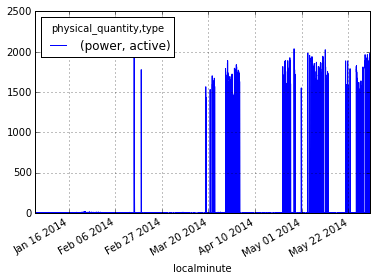

In [78]:
ac_188_2.plot()

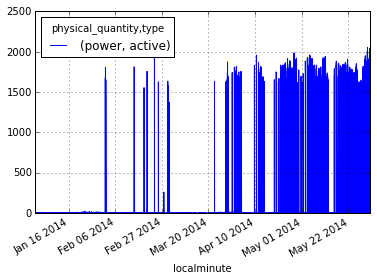

In [79]:
ac_188_3.plot()

In [85]:
ac_188_1[ac_188_1>1000].describe()

count    13137.000000
mean      3337.745985
std        378.739032
min       1008.000000
25%       3197.000000
50%       3416.000000
75%       3563.000000
max       3976.000000
Name: (power, active), dtype: float64

In [86]:
ac_188_2[ac_188_2>1000].describe()

count    6377.000000
mean     1698.093931
std       147.757231
min      1001.000000
25%      1597.000000
50%      1703.000000
75%      1817.000000
max      2035.000000
Name: (power, active), dtype: float64

In [87]:
ac_188_3[ac_188_3>1000].describe()

count    7019.000000
mean     1689.059553
std       157.489109
min      1001.000000
25%      1604.000000
50%      1721.000000
75%      1800.000000
max      2051.000000
Name: (power, active), dtype: float64

The power consumption of these ACs is rated at 14.8 A current which is about 3550 Watts. Most of the times, these ACs consume rated pwoer.

In [95]:
i = 2
df = age_energy[age_energy.Model__c==count.index[i]]
df

,dataid,Manufacturer__c,Model__c,year,age
409,3938,Carrier,24ABB330W310,2011,3
410,4495,Carrier,24ABB330W310,2012,2
417,5009,Carrier,24ABB330W310,2012,2


In [98]:
print original_name_map[5009]

KeyError: 5009

In [99]:
i = 3
df = age_energy[age_energy.Model__c==count.index[i]]
df

,dataid,Manufacturer__c,Model__c,year,age
412,7114,Goodman,GSX130361EA,2012,2
416,8342,Goodman,GSX130361EA,2012,2


In [101]:
print original_name_map[8342]

194


In [102]:
i = 4
df = age_energy[age_energy.Model__c==count.index[i]]
df

,dataid,Manufacturer__c,Model__c,year,age
67,3036,Carrier,24ABC630A300,2011,3
161,2242,Carrier,24ABC630A300,2011,3


In [104]:
print original_name_map[2242]

60


In [105]:
i = 5
df = age_energy[age_energy.Model__c==count.index[i]]
df

,dataid,Manufacturer__c,Model__c,year,age
381,1697,Carrier,24ABA436A310,2008,6
582,4352,Carrier,24ABA436A310,2008,6


In [108]:
print original_name_map[1697]
print original_name_map[4352]

42
112


In [110]:
ac_42 = ds.buildings[42].elec[('air conditioner', 1)].load().next()[('power','active')]
ac_112 = ds.buildings[112].elec[('air conditioner', 1)].load().next()[('power','active')]


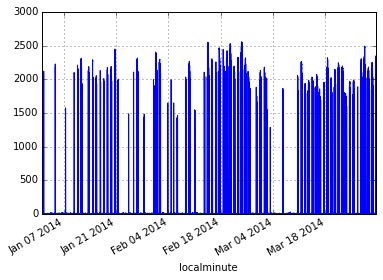

In [113]:
ac_42.plot()

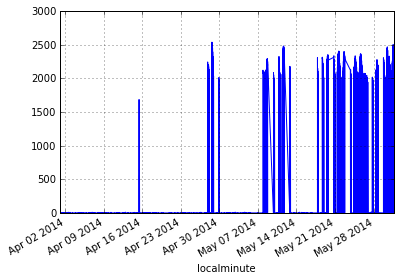

In [114]:
ac_112.plot()

In [117]:
ac_42[ac_42>1000].describe()

count    6063.000000
mean     2090.156193
std       258.623298
min      1003.000000
25%      1986.000000
50%      2126.000000
75%      2250.000000
max      2559.000000
Name: (power, active), dtype: float64

In [118]:
ac_112[ac_112>1000].describe()

count    2586.000000
mean     2117.012761
std       311.275890
min      1005.000000
25%      2066.000000
50%      2191.000000
75%      2319.000000
max      2541.000000
Name: (power, active), dtype: float64

In [119]:
i = 6
df = age_energy[age_energy.Model__c==count.index[i]]
df

,dataid,Manufacturer__c,Model__c,year,age
130,7510,Lennox,XP1903623005,2009,5
131,7510,Lennox,XP1903623005,2009,5


In [122]:
#original_name_map[7510]

In [121]:
i = 7
df = age_energy[age_energy.Model__c==count.index[i]]
df

,dataid,Manufacturer__c,Model__c,year,age
39,2470,Carrier,24ABB430A300,2008,6
513,2814,Carrier,24ABB430A300,2009,5


In [124]:
original_name_map[2470], original_name_map[2814]

(66, 73)

In [125]:
ac_66 = ds.buildings[66].elec[('air conditioner', 1)].load().next()[('power','active')]
ac_73 = ds.buildings[73].elec[('air conditioner', 1)].load().next()[('power','active')]



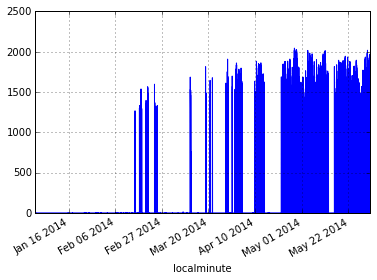

In [126]:
ac_66.plot()

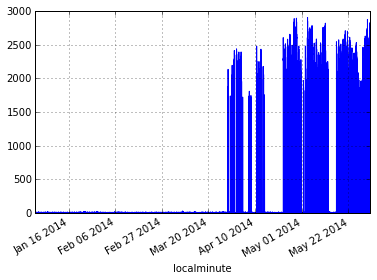

In [127]:
ac_73.plot()

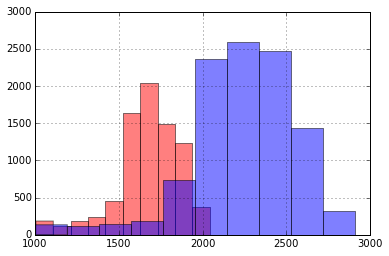

In [139]:
ac_66[ac_66>1000].hist(alpha=0.5, color='r')
ac_73[ac_73>1000].hist(alpha=0.5)

In [140]:
ac_66[ac_66>1000].describe()

count    7961.000000
mean     1669.278859
std       193.440549
min      1004.000000
25%      1583.000000
50%      1683.000000
75%      1811.000000
max      2043.000000
Name: (power, active), dtype: float64

In [141]:
ac_73[ac_73>1000].describe()

count    10492.000000
mean      2240.548227
std        306.107368
min       1001.000000
25%       2073.750000
50%       2259.000000
75%       2453.000000
max       2908.000000
Name: (power, active), dtype: float64

In [136]:
240*18.7/2

2244.0

In [137]:
240*18.1/2

2172.0